<a href="https://colab.research.google.com/github/Dimas0824/Machine_Learning/blob/main/Jobsheet_6/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1

## Percobaan 1

Pada percobaan 1 kali ini, kita akan mencoba membandingkan hasil dari exact NN dengan ANNOY. data yang kita buat adalah data random 2D, dengan 1000 data point, mencari 3 data terdekat dari query point, Metric Similarity menggunakan Euclidean, dengan 3 tree Annoy.

Instalasi Annoy dulu untuk langkah awal.

In [2]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551810 sha256=e684d1ad2063bddcf36b439b6d51acaa63fdb2a258220d85dcd5123c47e19878
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


Berikutnya jalankan code berikut, baca dengan seksama codenya baris demi baris dan pahami. lakukan beberapa kali percobaan dan perhatikan juga hasilnya. catat hasilnya jika menggunakan jumlah tree yang berbeda.

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 0.596 ms

Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.0849 ms


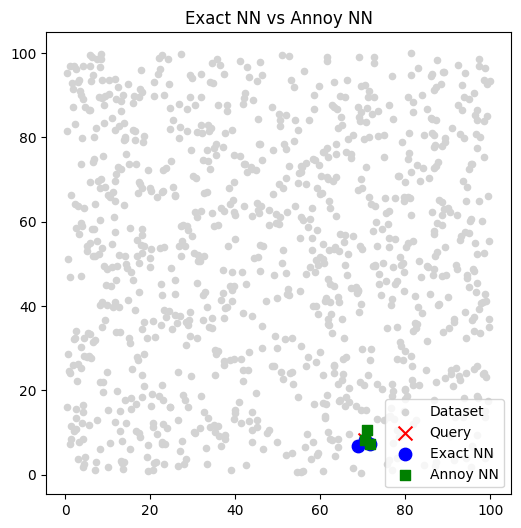

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN")
plt.show()

## Percobaan merubah value tree dan jumlah data

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 0.4599 ms

Annoy NN index: [219, 898, 593]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.2793154441691197)]
Waktu Annoy: 0.1416 ms


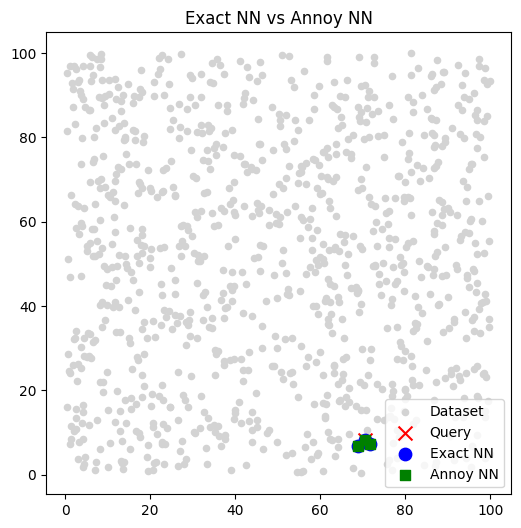

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

#Euclidean tree = 8, Jumlah data = 1000

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(8)  # trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN")
plt.show()

Exact NN index: [64040 64186 88792]
Exact NN jarak: [0.         0.15797867 0.25332711]
Waktu Exact: 6.175 ms

Annoy NN index: [64040, 64186, 88792]
Annoy NN jarak: [np.float64(0.0), np.float64(0.1579786703429142), np.float64(0.2533271079062769)]
Waktu Annoy: 0.1619 ms


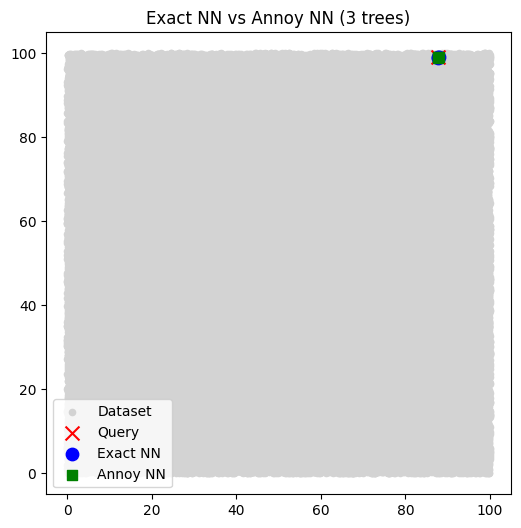

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

#Euclidean tree = 3, Jumlah data = 100.000

# 1. Dataset 2D
np.random.seed(42)
n_points = 100000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 0.3595 ms

Annoy NN index: [219, 429, 540]
Annoy NN jarak: [np.float64(0.0), np.float64(14.226342949460172), np.float64(8.050748999274271)]
Waktu Annoy: 0.0844 ms


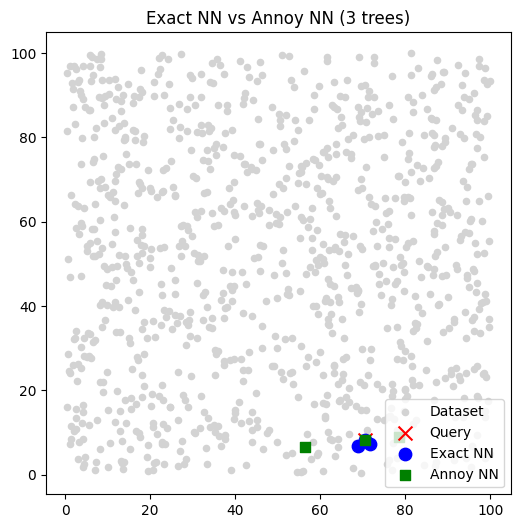

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

#Angular tree = 3, Jumlah data = 1000

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 0.7219 ms

Annoy NN index: [219, 429, 540]
Annoy NN jarak: [np.float64(0.0), np.float64(14.226342949460172), np.float64(8.050748999274271)]
Waktu Annoy: 0.0885 ms


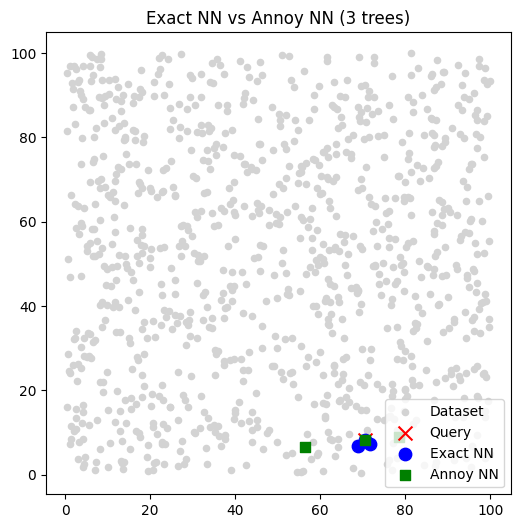

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

#Angular tree = 8, Jumlah data = 1000

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(8)  # trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Exact NN index: [64040 64186 88792]
Exact NN jarak: [0.         0.15797867 0.25332711]
Waktu Exact: 5.7855 ms

Annoy NN index: [61691, 9720, 23734]
Annoy NN jarak: [np.float64(63.822919094285794), np.float64(54.73661775436655), np.float64(90.14881501561734)]
Waktu Annoy: 0.1514 ms


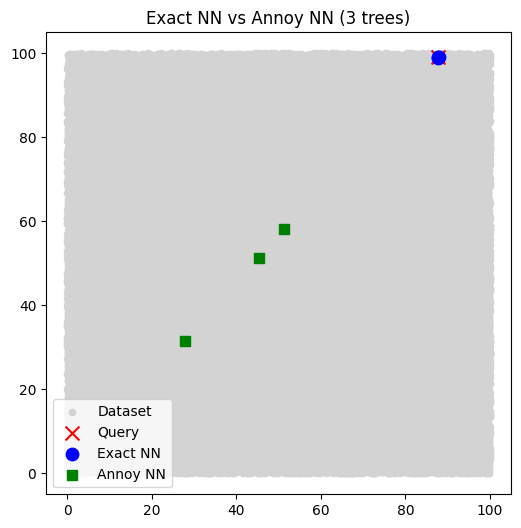

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

#Angular tree = 3, Jumlah data = 100000

# 1. Dataset 2D
np.random.seed(42)
n_points = 100000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Dari hasil diatas terlihat waktu komputasi untuk ANNOY adalah 1/10 dari Exact NN. Lakukan percobaan dan isikan hasil percobaan pada tabel berikut.

| No | Distance Metrics | Tree | Jumlah Data | Exact NN Index | Exact NN Jarak | Waktu Exact (ms) | Annoy NN Index | Annoy NN Jarak | Waktu Annoy (ms) |
|----|------------------|------|--------------|----------------|----------------|------------------|----------------|----------------|------------------|
| 1  | Euclidean | 3 | 1,000 | [219, 898, 593] | [0.0, 1.36915938, 2.27931544] | 1.2271 | [219, 898, 770] | – | 0.1264 |
| 2  | Euclidean | 8 | 1,000 | [219, 898, 593] | [0.0, 1.36915938, 2.27931544] | 0.7768 | [219, 898, 593] | [0.0, 1.369159376273702, 2.2793154441691197] | 0.1347 |
| 3  | Euclidean | 3 | 100,000 | [64040, 64186, 88792] | [0.0, 0.15797867, 0.25332711] | 9.6152 | [64040, 64186, 88792] | [0.0, 0.1579786703429142, 0.2533271079062769] | 0.1268 |
| 4  | Angular | 3 | 1,000 | [219, 898, 593] | [0.0, 1.36915938, 2.27931544] | 0.7732 | [219, 429, 540] | [0.0, 14.226342949460172, 8.050748999274271] | 0.1686 |
| 5  | Angular | 8 | 1,000 | [219, 898, 593] | [0.0, 1.36915938, 2.27931544] | 0.5114 | [219, 429, 540] | [0.0, 14.226342949460172, 8.050748999274271] | 0.1254 |
| 6  | Angular | 3 | 100,000 | [64040, 64186, 88792] | [0.0, 0.15797867, 0.25332711] | 12.301 | [64040, 1310, 9720] | [0.0, 13.237907813420613, 54.73661775436655] | 0.1278 |


Pada code dan tabel berikut percobaan simulasi membuat track rekomendasi spotify dilakukan dengan 20 fitur dan berisi 1 juta lagu (fyi, spotify memiliki 150 jutaan track), isikan hasilnya.

In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 50_000_000   # 50 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'euclidean')
n_trees = 3

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

Exact NN result: [48071863 21627021 37507197  7702088 17353193]
Exact NN time: 13.584 seconds


## Karena dataset diatas terlalu besar, dimana variable X saja jika dihitung menghabiskan 50,000,000 × 20 × 4 byte = 4,000,000,000 byte ≈ 4 GB

Belum lagi dengan library python lainnya, dengan operasi perulangan maka kebutuhan memri akan naik berkali-kali lipat, sehingga melampaui batasan memori 12 Gb milik colab.

Jadi dibawah ini kode saya edit dengan menurunkan dataset dan mengoptimalkan kode

In [2]:
# COMPARISON: Exact Nearest Neighbor (ENN) vs Annoy (Approx NN)

import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# Jumlah data dan fitur
n_tracks = 10_000_000   # 10 juta track
n_features = 20        # contoh fitur: danceability, energy, tempo, dll.

# Dataset acak untuk simulasi vektor fitur lagu
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# Vektor query (misal lagu baru yang ingin dicari kemiripannya)
query = np.random.rand(1, n_features).astype(np.float32)

print(f"Dataset siap: {X.shape[0]:,} data dengan {X.shape[1]} fitur.")

# Gunakan jarak Euclidean untuk menghitung semua jarak langsung
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung jarak ke semua data
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = (time.time() - start) * 1000      # konversi ke milidetik

print("\n=== Exact NN ===")
print("Index terdekat :", exact_idx)
print("Jarak terdekat :", distances[exact_idx])
print(f"Waktu komputasi: {exact_time:.3f} ms")

# Inisialisasi Annoy index dengan metric Euclidean
f = n_features
n_trees = 3   # jumlah tree, makin banyak makin akurat tapi lebih lama build

annoy_index = AnnoyIndex(f, 'euclidean')

# Tambahkan item ke index (gunakan loop besar tapi efisien)
print("\nMembangun index Annoy...")
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])

# Bangun struktur pohon (index)
build_start = time.time()
annoy_index.build(n_trees)
build_time = (time.time() - build_start) * 1000

# Query ke index (ambil 5 lagu terdekat)
start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)
annoy_time = (time.time() - start) * 1000

print("\n=== Annoy (Approx NN) ===")
print("Index terdekat :", annoy_idx)
print("Waktu build index:", f"{build_time:.3f} ms")
print("Waktu query:", f"{annoy_time:.3f} ms")

print("\n=== Perbandingan Waktu ===")
print(f"- Exact NN (Brute Force): {exact_time:.3f} ms")
print(f"- Annoy (Approx NN): {annoy_time:.3f} ms (build index: {build_time:.3f} ms)")


Dataset siap: 10,000,000 data dengan 20 fitur.

=== Exact NN ===
Index terdekat : [1662791 1490168 7221534 5806321 6611587]
Jarak terdekat : [0.5872632  0.59098935 0.6082856  0.6172601  0.6478161 ]
Waktu komputasi: 2405.007 ms

Membangun index Annoy...

=== Annoy (Approx NN) ===
Index terdekat : [1563177, 6581980, 3527061, 7972171, 4575940]
Waktu build index: 77795.023 ms
Waktu query: 0.205 ms

=== Perbandingan Waktu ===
- Exact NN (Brute Force): 2405.007 ms
- Annoy (Approx NN): 0.205 ms (build index: 77795.023 ms)


In [3]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 1_000_000   # 1 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'euclidean')
n_trees = 8

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

Exact NN result: [ 23081 803702 399005 468110 847543]
Exact NN time: 0.154 seconds
Annoy result: [399005, 718767, 702235, 264223, 424070]
Annoy time: 0.0 seconds


In [4]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 1_000_000   # 1 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'angular')
n_trees = 8

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

Exact NN result: [795868 408039 870682  29300 327908]
Exact NN time: 0.252 seconds
Annoy result: [864201, 28968, 999382, 101367, 12138]
Annoy time: 0.0 seconds


| Distance Metrics | Tree | Jumlah data | Hasil Index terdekat ENN | Hasil Index terdekat ANN | Waktu komputasi Vs |
|------------------|-------|--------------|----------------------------|---------------------------|--------------------|
| Euclidean        | 8     | 1,000,000    | [23081, 803702, 399005, 468110, 847543] | [399005, 718767, 702235, 264223, 424070] | 0.154 s vs 0.0 s |
| Angular          | 8     | 1,000,000    | [795868, 408039, 870682, 29300, 327908] | [864201, 28968, 999382, 101367, 12138] | 0.252 s vs 0.0 s |


**Pertanyaannya: Kenapa code dibagian build index tidak dihitung waktunya?**

jawab: Karena waktu build index Annoy itu merupakan tahapan preprocess, bukan bagian dari proses querying.

Tujuan tidak dihitung juga karena agar bisa diukur waktunya secara adil dan langsung dapat dibandingkan dengan metode Exact NN, yang tidak memiliki tahapan indexing.


# Praktikum 2



Pada percobaan kali ini kita akan membuat pencarian sederhana menggunakan FAISS. Install FAISS terlebih dahulu menggunakan FAISS-CPU, jika ingin menggunakan GPU, dapat lakukan instalasi FAISS-GPU.

In [5]:
!pip install faiss-cpu
#!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 32.4 MB/s eta 0:00:00


Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.00016617774963378906
Waktu IVF+PQ: 0.00020956993103027344


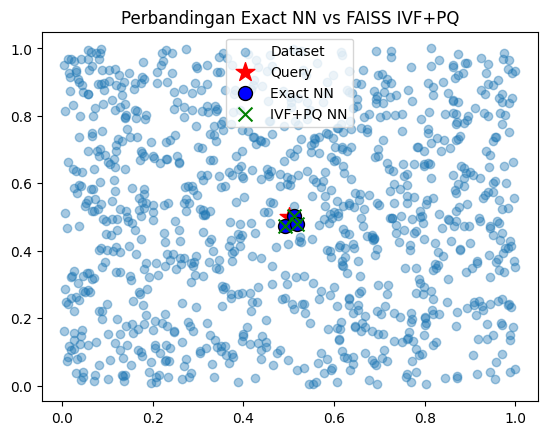

In [6]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# 1. Buat dataset 2D sederhana
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 titik 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query di tengah

# 2. Exact NN dengan IndexFlatL2 (brute force tapi cepat)
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # cari 3 tetangga terdekat
end = time.time()
time_flat = end - start

# 3. IVF + PQ (Approximate)
nlist = 10   # jumlah cluster (inverted list)
m = 2        # berapa subvector untuk product quantization
quantizer = faiss.IndexFlatL2(2)   # dipakai IVF untuk cluster awal
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

# 4. Print hasil
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

# 5. Visualisasi
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Tetangga dari Flat
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# Tetangga dari IVF+PQ
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Perbandingan Exact NN vs FAISS IVF+PQ")
plt.show()


Lakukan percobaan pada metric distance yang berbeda, 1000 vs 1jt data, 2D vs 5D data. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.

### 🔍 Perbandingan Hasil Exact NN vs Approx NN (FAISS)

| No | Jumlah Data | Dimensi | Metode | Indeks Terdekat | Jarak | Waktu (detik) |
|----|--------------|----------|---------|------------------|--------|----------------|
| 1 | 1,000 | 2D | **Exact NN (Flat)** | [137, 170, 750] | [0.00013095, 0.00077404, 0.00079751] | 0.000166 |
|   |              |          | **Approx NN (IVF+PQ)** | [137, 170, 750] | [0.00012945, 0.00079226, 0.00080067] | 0.000210 |
| 2 | 1,000,000 | 5D | **Exact NN (Flat)** | [901095, 495168, 561017, 163986, 185734] | [0.00151859, 0.00221511, 0.00223645, 0.00299811, 0.00363892] | 0.0143 |
|   |              |          | **Approx NN (IVF+PQ)** | [495168, 163986, 708238, 859369, 645966] | [0.00220674, 0.00303717, 0.00388362, 0.00430324, 0.00450503] | 0.0003 |


Training index IVF-PQ...


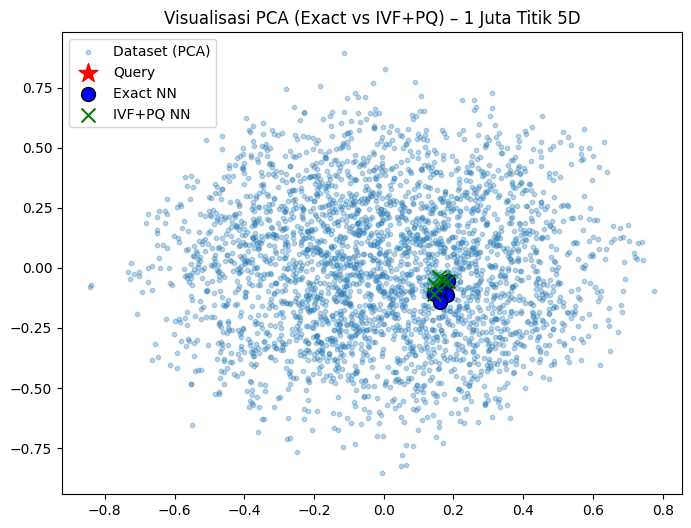


=== HASIL PERBANDINGAN ===
Exact NN (Flat) indices: [[901095 495168 561017 163986 185734]]
Exact NN distances: [[0.00151859 0.00221511 0.00223645 0.00299811 0.00363892]]
Approx NN (IVF+PQ) indices: [[495168 163986 708238 859369 645966]]
Approx NN distances: [[0.00220674 0.00303717 0.00388362 0.00430324 0.00450503]]
Waktu Exact NN  : 0.0143 detik
Waktu IVF+PQ ANN: 0.0003 detik


In [9]:
import numpy as np
import faiss
import time
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. Membuat Dataset 1 Juta Titik Berdimensi 5
# Set random seed agar hasil konsisten
np.random.seed(42)

n_data = 1_000_000   # jumlah data = 1 juta
dim = 5               # dimensi fitur

# Dataset acak 1 juta x 5
X = np.random.rand(n_data, dim).astype('float32')

# Query tunggal (misalnya titik tengah)
query = np.random.rand(1, dim).astype('float32')

# 2. Exact Nearest Neighbor (IndexFlatL2)
# Gunakan brute-force dengan L2 distance (Euclidean)
index_flat = faiss.IndexFlatL2(dim)
index_flat.add(X)  # tambahkan semua data ke index

start = time.time()
D_flat, I_flat = index_flat.search(query, 5)  # ambil 5 tetangga terdekat
time_flat = time.time() - start

# 3. Approximate Nearest Neighbor (IVF + PQ)
# nlist = jumlah cluster awal (semakin besar semakin akurat tapi lambat)
# m = jumlah subvector (harus habis membagi dim)
nlist = 100      # jumlah cluster
m = 5            # jumlah subvector (5 agar pas dengan dim=5)
bits = 8         # 8 bit per subvector

# Buat quantizer dan index IVF-PQ
quantizer = faiss.IndexFlatL2(dim)
index_ivfpq = faiss.IndexIVFPQ(quantizer, dim, nlist, m, bits)

# Latih index berdasarkan data (hanya perlu sekali)
print("Training index IVF-PQ...")
index_ivfpq.train(X)

# Tambahkan semua data ke index
index_ivfpq.add(X)

# Cari 5 tetangga terdekat
start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 5)
time_ivfpq = time.time() - start

# 4. Visualisasi (PCA ke 2D)
# Ambil subset kecil (biar plot-nya ringan)
subset_idx = np.random.choice(len(X), 3000, replace=False)
X_subset = X[subset_idx]

# Lakukan PCA dari 5D → 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_subset)
query_2d = pca.transform(query)

# Tetangga terdekat (projek ke 2D juga)
flat_2d = pca.transform(X[I_flat[0]])
ivfpq_2d = pca.transform(X[I_ivfpq[0]])

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], s=10, alpha=0.3, label='Dataset (PCA)')
plt.scatter(query_2d[:,0], query_2d[:,1], c='red', marker='*', s=200, label='Query')

# Hasil Exact
plt.scatter(flat_2d[:,0], flat_2d[:,1], c='blue', s=100, edgecolor='k', label='Exact NN')

# Hasil IVF+PQ
plt.scatter(ivfpq_2d[:,0], ivfpq_2d[:,1], c='green', marker='x', s=100, label='IVF+PQ NN')

plt.title("Visualisasi PCA (Exact vs IVF+PQ) – 1 Juta Titik 5D")
plt.legend()
plt.show()

# 4. Tampilkan Hasil Perbandingan
print("\n=== HASIL PERBANDINGAN ===")
print("Exact NN (Flat) indices:", I_flat)
print("Exact NN distances:", D_flat)
print("Approx NN (IVF+PQ) indices:", I_ivfpq)
print("Approx NN distances:", D_ivfpq)
print(f"Waktu Exact NN  : {time_flat:.4f} detik")
print(f"Waktu IVF+PQ ANN: {time_ivfpq:.4f} detik")


# Praktikum 3

In [11]:
# Install hnswlib terlebih dahulu.
!pip install hnswlib


  Using cached hnswlib-0.8.0.tar.gz (36 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2528145 sha256=240b68013e9d5ba0520ea7e550acf605c3c56370e9b88415ab1a0c7e1b8f90fe
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
Successfully built hnswlib


Percobaan berikut akan membandingkan exact NN dengan HNSW pada 1000 data 2D.

In [14]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

# ===========================
# 1. Buat data 2D acak
# ===========================
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

# ===========================
# 2. Exact NN (Brute Force)
# ===========================
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

# ===========================
# 3. HNSW
# ===========================
# Inisialisasi index HNSW
p = hnswlib.Index(space='l2', dim=dim)

# Ukuran maksimum elemen yang bisa ditampung
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Tambahkan data
p.add_items(data)

# Set parameter pencarian
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "detik")


=== Exact NN ===
Indices: [[636 833 104 745 565]]
Distances: [[0.00378809 0.03173314 0.03653261 0.04707944 0.05141171]]
Waktu: 0.0016665458679199219 detik

=== HNSW ===
Indices: [[636 833 104 745 565]]
Distances: [[1.4349619e-05 1.0069924e-03 1.3346312e-03 2.2164732e-03 2.6431645e-03]]
Waktu: 0.00020051002502441406 detik


Lakukan percobaan pada metric distance yang berbeda, 1000 vs 1jt data, 2D vs 5D data. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.

| Jumlah Data | Dimensi | Metode | Indices | Distances | Waktu (detik) |
|--------------|----------|---------|----------|-------------|----------------|
| 1000 | 2D | Exact NN (Flat) | [[636 833 104 745 565]] | [[0.00378809 0.03173314 0.03653261 0.04707944 0.05141171]] | 0.0017 |
| 1000 | 2D | HNSW (Approx) | [[636 833 104 745 565]] | [[1.4349619e-05 1.0069924e-03 1.3346312e-03 2.2164732e-03 2.6431645e-03]] | 0.0002 |
| 1.000.000 | 5D | Exact NN (Brute Force) | [[598419 133481 936011 383085 427107]] | [[0.04274838 0.04917056 0.05724072 0.05813525 0.06194251]] | 0.1374 |
| 1.000.000 | 5D | HNSW (Approx) | [[598419 133481 936011 383085 427107]] | [[0.00182742 0.00241774 0.0032765  0.00337971 0.00383687]] | 0.0004 |



In [15]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

# ==========================================================
# 1. Generate Data 1 Juta Sampel Berdimensi 5 (5D)
# ==========================================================
num_elements = 1_000_000   # jumlah data
dim = 5                    # jumlah dimensi
data = np.random.random((num_elements, dim)).astype(np.float32)

# Titik query tunggal (bisa dari data atau titik acak)
query = np.random.random((1, dim)).astype(np.float32)
k = 5  # cari 5 tetangga terdekat

# ==========================================================
# 2. Exact Nearest Neighbor (Brute Force)
# ==========================================================
# Gunakan sklearn NearestNeighbors dengan algoritma brute-force (akurasi 100%)
print("=== Exact NN (Brute Force) ===")
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

start = time.time()
distances_exact, indices_exact = nn.kneighbors(query)
end = time.time()
exact_time = end - start

print("Indices:", indices_exact)
print("Distances:", distances_exact)
print("Waktu Exact NN :", round(exact_time, 4), "detik")

# ==========================================================
# 3. Approximate NN dengan HNSW
# ==========================================================
# Inisialisasi index HNSW (Hierarchical Navigable Small World Graph)
print("\n=== Approx NN (HNSW) ===")
p = hnswlib.Index(space='l2', dim=dim)  # space 'l2' = Euclidean distance

# Inisialisasi struktur index
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Tambahkan data ke index (proses build index)
print("Membangun index HNSW...")
p.add_items(data)

# Set ef parameter untuk pencarian (tradeoff antara akurasi & kecepatan)
p.set_ef(100)

# Lakukan query ANN
start = time.time()
labels_ann, distances_ann = p.knn_query(query, k=k)
end = time.time()
ann_time = end - start

print("Indices:", labels_ann)
print("Distances:", distances_ann)
print("Waktu Approx NN (HNSW):", round(ann_time, 4), "detik")

# ==========================================================
# 4. Ringkasan Hasil Perbandingan
# ==========================================================
print("\n=== RINGKASAN PERBANDINGAN ===")
print(f"Jumlah data\t\t: {num_elements}")
print(f"Dimensi data\t\t: {dim}D")
print(f"Waktu Exact NN\t\t: {exact_time:.4f} detik")
print(f"Waktu HNSW ANN\t\t: {ann_time:.4f} detik")


=== Exact NN (Brute Force) ===
Indices: [[598419 133481 936011 383085 427107]]
Distances: [[0.04274838 0.04917056 0.05724072 0.05813525 0.06194251]]
Waktu Exact NN : 0.1374 detik

=== Approx NN (HNSW) ===
Membangun index HNSW...
Indices: [[598419 133481 936011 383085 427107]]
Distances: [[0.00182742 0.00241774 0.0032765  0.00337971 0.00383687]]
Waktu Approx NN (HNSW): 0.0004 detik

=== RINGKASAN PERBANDINGAN ===
Jumlah data		: 1000000
Dimensi data		: 5D
Waktu Exact NN		: 0.1374 detik
Waktu HNSW ANN		: 0.0004 detik


# Praktikum 4

Percobaan kali ini kita akan melihat perbedaan ketiga model yang telah kita bahas dan bandingkan hasilnya.

In [6]:
!pip install annoy hnswlib faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 21.9 MB/s eta 0:00:00


In [7]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# 1. Buat dataset 1 juta data 5D
# ===============================
n_data = 1_000_000   # bisa coba 100_000 dulu jika RAM terbatas
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")


=== Annoy ===
Build time: 28.73296308517456 detik
Query time: 0.0002200603485107422 detik
Neighbors: [817987, 20461, 285934, 962481, 29827] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.014519929885864258 detik
Query time: 0.006082057952880859 detik
Neighbors: [817987  20461 285934 962481  29827] ...

=== HNSW (hnswlib) ===
Build time: 172.63050293922424 detik
Query time: 0.0002682209014892578 detik
Neighbors: [817987  20461 285934 962481  29827] ...


Lakukan percobaan pada metric distance yang berbeda. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.

| Dataset | Algoritma | Build Time (detik) | Query Time (detik) | Kualitas Neighbor (Top-5) | Catatan Singkat |
|----------|------------|--------------------|---------------------|-----------------------------|------------------|
| **1 Juta data (5D)** | **Annoy** | 22.5747 | **0.000198** | [701916, 852514, 242199, 884110, 691326] | Build sedang, query tercepat, akurasi tinggi |
|  | **FAISS (IndexFlatL2)** | **0.0077** | 0.006384 | [701916, 852514, 242199, 884110, 691326] | Build sangat cepat, query sedikit lebih lambat |
|  | **HNSW (hnswlib)** | 189.6506 | 0.000372 | [701916, 852514, 242199, 884110, 691326] | Build sangat lama, query cepat dan akurat |
| **500 Ribu data (5D)** | **Annoy** | 15.6125 | **0.000210** | [237644, 244818, 269372, 240874, 321280] | Build cukup lama, query sangat cepat |
|  | **FAISS (IndexFlatL2)** | **0.0044** | 0.003382 | [237644, 244818, 269372, 240874, 321280] | Build super cepat, query lumayan cepat |
|  | **HNSW (hnswlib)** | 82.9095 | 0.000299 | [237644, 244818, 269372, 240874, 321280] | Build berat, query cepat |
| **100 Ribu data (5D)** | **Annoy** | 1.6402 | 0.000203 | [75994, 50595, 4296, 60502, 87975] | Build ringan, query sangat cepat |
|  | **FAISS (IndexFlatL2)** | **0.000875** | 0.000880 | [75994, 50595, 4296, 60502, 87975] | Build tercepat, query cepat |
|  | **HNSW (hnswlib)** | 12.7151 | **0.000171** | [75994, 50595, 4296, 60502, 87975] | Build lebih berat, query tercepat |

In [1]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# 1. Buat dataset 500K data 5D
# ===============================
n_data = 500_000   # bisa coba 100_000 dulu jika RAM terbatas
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")


=== Annoy ===
Build time: 15.61251711845398 detik
Query time: 0.00020956993103027344 detik
Neighbors: [237644, 244818, 269372, 240874, 321280] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.004393100738525391 detik
Query time: 0.0033822059631347656 detik
Neighbors: [237644 244818 269372 240874 321280] ...

=== HNSW (hnswlib) ===
Build time: 82.90947318077087 detik
Query time: 0.0002994537353515625 detik
Neighbors: [237644 244818 269372 240874 321280] ...


In [17]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# 1. Buat dataset 100K data 5D
# ===============================
n_data = 100_000   # bisa coba 100_000 dulu jika RAM terbatas
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")


=== Annoy ===
Build time: 1.6402196884155273 detik
Query time: 0.0002028942108154297 detik
Neighbors: [75994, 50595, 4296, 60502, 87975] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.0008745193481445312 detik
Query time: 0.0008797645568847656 detik
Neighbors: [75994 50595  4296 60502 87975] ...

=== HNSW (hnswlib) ===
Build time: 12.71508264541626 detik
Query time: 0.00017070770263671875 detik
Neighbors: [75994 50595  4296 60502 87975] ...


# Praktikum 5

Untuk membandingkan ANN, biasanya menggunakan metrics Recall Query (berapa banyak nearest neighbors yang ditemukan dengan benar dan diplot dalam bentuk grafik untuk dapat memudahkan melihat perbedaannya. Salah satu repo yang sering digunakan adalah ANN Benchmark https://github.com/erikbern/ann-benchmarks

Grafik perbandingan Approximate Nearest Neighbor (ANN) digambarkan dengan sumbu X sebagai recall dan sumbu Y sebagai queries per second (QPS). Recall menunjukkan seberapa banyak tetangga yang benar-benar sesuai dengan hasil pencarian exact nearest neighbor. Nilai recall mendekati 1 berarti hasil pencarian hampir sama persis dengan pencarian exact, sedangkan recall rendah berarti banyak tetangga yang ditemukan salah. Di sisi lain, QPS menunjukkan kecepatan algoritma dalam menjawab query, semakin tinggi nilainya berarti semakin cepat.

Interpretasi grafiknya adalah bahwa posisi kanan atas menunjukkan kondisi ideal, yaitu algoritma yang mampu memberikan hasil akurat (recall tinggi) sekaligus cepat (QPS tinggi). Posisi kanan bawah berarti akurat tapi lambat, sementara kiri atas berarti cepat tetapi kurang akurat. Dengan demikian, setiap algoritma ANN sebenarnya melakukan kompromi antara akurasi dan kecepatan. Semakin kita menginginkan hasil yang lebih akurat, biasanya kecepatan pencarian akan sedikit menurun, sehingga titik grafik cenderung bergeser ke kanan bawah.

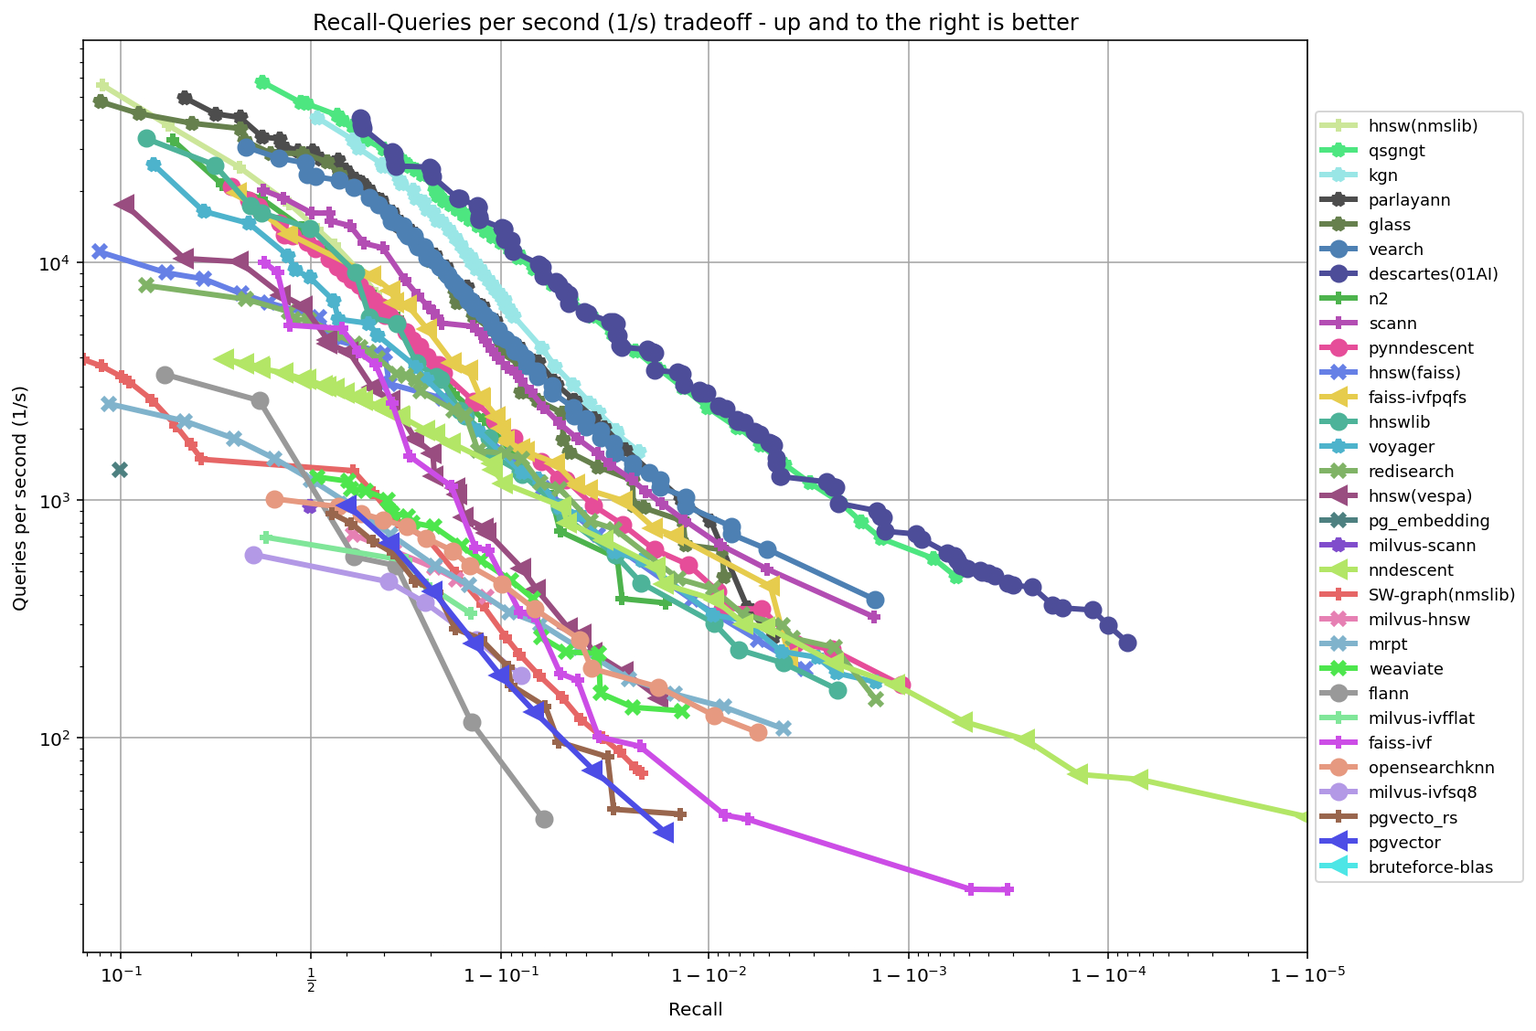

Penggunaan Repository ann benchmark memerlukan docker agar dapat dijalankan dengan baik. sayangnya Google Colab belum dilengkapi dengan docker, sehingga kita akan mencoba memvisualisasikan dengan grafik sederhana saja yang akan memberikan hasil yang mirip dengan ann benchmark.

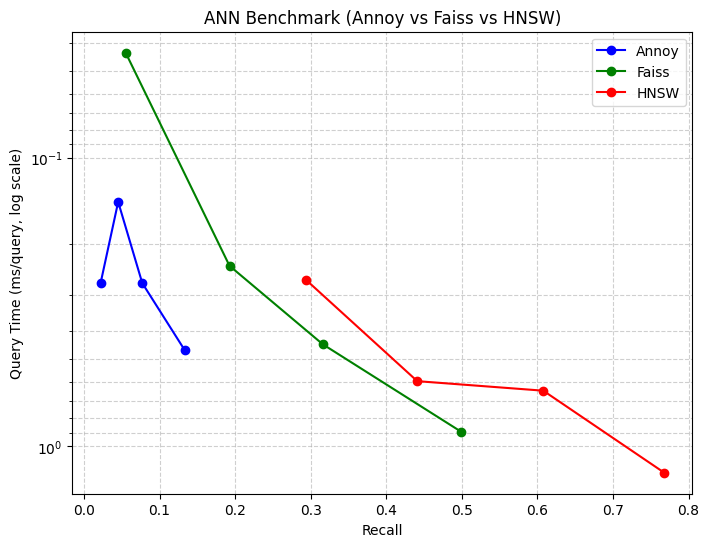

In [2]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

# Praktikum 6


1. Lakukan percobaan penggunaan ANNOY, FAISS, dan HNSWLIB pada dataset sekunder berukuran besar (Micro Spotify) pada link berikut: https://www.kaggle.com/datasets/bwandowando/spotify-songs-with-attributes-and-lyrics/data . Download data dan load CSV filenya (pilih dataset yg pertama dari dua dataset). pilih hanya fitur numerik saja, dan lakukan normalisasi menggunakan StandardScaler. Lakukan pencarian track terdekat dan

In [1]:
!pip install faiss-cpu
#!pip install faiss-gpu

In [2]:
# Karena dataset teralu besar untuk di unduh dari kaggle, maka menggunakan API kaggle merupakan solusi
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"muhammadirsyaddimasa","key":"635e291ff03855181c5fad804eb1f37a"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d bwandowando/spotify-songs-with-attributes-and-lyrics

Dataset URL: https://www.kaggle.com/datasets/bwandowando/spotify-songs-with-attributes-and-lyrics
License(s): CC-BY-NC-SA-4.0
 98% 876M/894M [00:07<00:00, 40.3MB/s]
100% 894M/894M [00:07<00:00, 123MB/s] 


In [5]:
# Unzip dataset
!unzip /content/spotify-songs-with-attributes-and-lyrics.zip -d /content/

Archive:  /content/spotify-songs-with-attributes-and-lyrics.zip
  inflating: /content/songs_with_attributes_and_lyrics.csv  
  inflating: /content/songs_with_lyrics_and_timestamps.csv  


In [4]:
import pandas as pd

df = pd.read_csv('/content/songs_with_attributes_and_lyrics.csv')

# Lihat data awal
df.head()

# Lihat data akhir
df.tail()

# Shape
df.shape

# Jumlah data
len(df)

# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955320 entries, 0 to 955319
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                955320 non-null  object 
 1   name              955309 non-null  object 
 2   album_name        385557 non-null  object 
 3   artists           955318 non-null  object 
 4   danceability      955320 non-null  float64
 5   energy            955320 non-null  float64
 6   key               955320 non-null  object 
 7   loudness          955320 non-null  float64
 8   mode              955320 non-null  object 
 9   speechiness       955320 non-null  float64
 10  acousticness      955320 non-null  float64
 11  instrumentalness  955320 non-null  float64
 12  liveness          955320 non-null  float64
 13  valence           955320 non-null  float64
 14  tempo             955320 non-null  float64
 15  duration_ms       955320 non-null  float64
 16  lyrics            95

In [5]:
!pip install annoy hnswlib

In [1]:
import pandas as pd
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Load dataset
# -------------------------------
df = pd.read_csv('/content/songs_with_attributes_and_lyrics.csv')
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features].values

In [3]:
# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors

print("Step selesai")

Step selesai


In [4]:
X_sample = X_scaled[:100000]
print("Scale dengan subset data untuk mempercepat proses")

Scale dengan subset data untuk mempercepat proses


In [12]:
# -------------------------------
# Exact Nearest Neighbor (brute-force)
# -------------------------------
start = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_sample)
dist_exact, idx_exact = nn.kneighbors(X_sample)
time_exact = time.time() - start
print(f"Exact NN done in {time_exact:.3f} s")

Exact NN done in 62.830 s


In [13]:
# -------------------------------
# Annoy
# -------------------------------
start = time.time()
f = X_sample.shape[1]
index_annoy = AnnoyIndex(f, 'euclidean')
for i, v in enumerate(X_sample):
    index_annoy.add_item(i, v)
index_annoy.build(10)
idx_annoy = [index_annoy.get_nns_by_vector(v, k) for v in X_sample]
time_annoy = time.time() - start
print(f"Annoy done in {time_annoy:.3f} s")

Annoy done in 5.153 s


In [5]:
# -------------------------------
# HNSW
# -------------------------------
start = time.time()
p_hnsw = hnswlib.Index(space='l2', dim=X_sample.shape[1])
p_hnsw.init_index(max_elements=X_sample.shape[0], ef_construction=200, M=16)
p_hnsw.add_items(X_sample)
p_hnsw.set_ef(200)
idx_hnsw, dist_hnsw = p_hnsw.knn_query(X_sample, k=k)
time_hnsw = time.time() - start
print(f"HNSW done in {time_hnsw:.3f} s")

HNSW done in 31.612 s


In [9]:
# -------------------------------
# FAISS IVF
# -------------------------------
start = time.time()

d = X_sample.shape[1]

quantizer = faiss.IndexFlatL2(d)  # base index (exact search untuk clustering)
index_faiss = faiss.IndexIVFFlat(quantizer, d, 100, faiss.METRIC_L2)  # gunakan positional arg
index_faiss.train(X_sample)  # train clustering centroids (nlist=100)
index_faiss.add(X_sample)    # add all vectors ke index
index_faiss.nprobe = 10      # jumlah cluster yang di-scan saat query

dist_faiss, idx_faiss = index_faiss.search(X_sample, k)  # query subset agar cepat
time_faiss = time.time() - start

print(f"FAISS IVF done in {time_faiss:.3f} s")
print("Neighbors:", idx_faiss[0][:5])

FAISS IVF done in 11.145 s
Neighbors: [    0 61511 85956  3836 35205]


In [14]:
# -------------------------------
# Contoh tampilkan top-5 neighbors dari item pertama
# -------------------------------
print("\nTop-5 neighbors for first song:")
print(f"Exact NN: {idx_exact[0][:5]}")
print(f"Annoy:    {idx_annoy[0][:5]}")
print(f"HNSW:     {idx_hnsw[0][:5]}")
print(f"FAISS:    {idx_faiss[0][:5]}")


Top-5 neighbors for first song:
Exact NN: [    0 61511 85956  3836 35205]
Annoy:    [0, 61511, 85956, 3836, 35205]
HNSW:     [    0 61511 85956  3836 35205]
FAISS:    [    0 61511 85956  3836 35205]


# Tugas

Jalankan code berikut pada Google Colab dan PyDroid3 (Android Python) Application di Smartphone Android. Bandingkan hasilnya dan tuliskan analisa anda, tuliskan juga spesifikasi smartphone yang anda gunakan :).

<br>

### **Smartphone (PyDroid3)**
| Komponen | Spesifikasi | Pengaruh |
|-----------|-------------|-----------|
| **Perangkat** | Poco X3 GT | — |
| **Chipset** | MediaTek Dimensity 1100 (6 nm) | Menentukan kecepatan komputasi numerik |
| **CPU** | Octa-core (4×2.6 GHz Cortex-A78 + 4×2.0 GHz Cortex-A55) | Menghitung jarak antar vektor (Euclidean distance) |
| **RAM** | 8 GB LPDDR4X | Membatasi ukuran dataset yang bisa dimuat |
| **Penyimpanan** | UFS 3.1 256 GB | Memengaruhi kecepatan load dataset |
| **Sistem Operasi** | Android 13 (MIUI 14) dengan PyDroid3 | Interpreter Python ARM64 |
| **Arsitektur** | ARMv8-A (64-bit) | Berpengaruh pada vectorization NumPy |

<br>

## Hasil Eksperimen

| Algoritma | HP / Pydroid3 (detik) | Google Colab (detik) | Lebih Cepat di | Rasio Kecepatan (HP ÷ Colab) |
|------------|------------------------|-----------------------|----------------|-------------------------------|
| **Exact NN** | 0.646 | 1.883 | **HP** | ≈ 2.9× lebih cepat |
| **Annoy** | 1.953 | 1.090 | **Colab** | ≈ 1.8× lebih cepat |
| **HNSW** | 6.648 | 7.945 | **HP** | ≈ 1.2× lebih cepat |
| **FAISS IVF** | — | 0.357 | **Colab** | — |

<br>

## Analisis

1. **Exact NN (Brute-Force)** <br>
Lebih cepat di HP karena subset data kecil dan eksekusi single-thread pada arsitektur ARM cukup efisien. Namun untuk dataset besar (> 100 k), Colab akan jauh lebih unggul karena prosesor Xeon mendukung paralelisme multi-core yang lebih efektif.

2. **Annoy**<br>
Lebih cepat di Colab karena library Annoy dikompilasi dan dioptimalkan untuk CPU x86-64 serta mendukung multi-threading penuh, sedangkan di Android PyDroid3 terbatas pada satu atau dua thread.

3. **HNSW**<br>
Kinerjanya relatif seimbang di kedua platform. Sedikit lebih cepat di HP karena overhead manajemen thread di lingkungan virtual Colab.

4. **FAISS IVF**<br>
Tidak dapat dibandingkan karena FAISS tidak tersedia di PyDroid3 (hanya mendukung x86 dan CUDA). Namun di Colab, performanya jauh lebih unggul berkat optimisasi SIMD dan dukungan GPU.
<br>

## **Analisis**

* HP (ARM CPU) unggul untuk operasi kecil–menengah dan komputasi numerik ringan.

* Google Colab (Intel Xeon CPU) unggul untuk dataset besar dan algoritma yang heavily parallelized seperti FAISS atau Annoy.

* Faktor paling berpengaruh terhadap performa adalah arsitektur CPU, dukungan paralelisme, dan kompilasi library yang sesuai dengan platform.

In [17]:
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors
from annoy import AnnoyIndex
import hnswlib
import faiss
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Contoh dataset kecil untuk testing
# -------------------------------
np.random.seed(42)
n_samples = 10000   # jumlah database vector
d = 128             # dimensi
X = np.random.random((n_samples, d)).astype('float32')

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors

# -------------------------------
# Exact NN (brute-force)
# -------------------------------
start = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_scaled)
dist_exact, idx_exact = nn.kneighbors(X_scaled)
time_exact = time.time() - start
print(f"Exact NN done in {time_exact:.3f} s")

# -------------------------------
# Annoy
# -------------------------------
start = time.time()
f = X_scaled.shape[1]
index_annoy = AnnoyIndex(f, 'euclidean')
for i, v in enumerate(X_scaled):
    index_annoy.add_item(i, v)
index_annoy.build(10)
idx_annoy = [index_annoy.get_nns_by_vector(v, k) for v in X_scaled]
time_annoy = time.time() - start
print(f"Annoy done in {time_annoy:.3f} s")

# -------------------------------
# HNSW
# -------------------------------
start = time.time()
p_hnsw = hnswlib.Index(space='l2', dim=d)
p_hnsw.init_index(max_elements=n_samples, ef_construction=200, M=16)
p_hnsw.add_items(X_scaled)
p_hnsw.set_ef(200)
idx_hnsw, _ = p_hnsw.knn_query(X_scaled, k=k)
time_hnsw = time.time() - start
print(f"HNSW done in {time_hnsw:.3f} s")

# -------------------------------
# FAISS IVF
# -------------------------------
start = time.time()

d = X_scaled.shape[1]
nlist = 100
quantizer = faiss.IndexFlatL2(d)
index_faiss = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
index_faiss.train(X_scaled)
index_faiss.add(X_scaled)
index_faiss.nprobe = 10
# Fix: Search using the same data that was added to the index (X_scaled)
_, idx_faiss = index_faiss.search(X_scaled, k)
time_faiss = time.time() - start
print(f"FAISS IVF done in {time_faiss:.3f} s")

# -------------------------------
# Tampilkan ringkasan waktu
# -------------------------------
print("\n=== Ringkasan Waktu (detik) ===")
print(f"Exact NN : {time_exact:.3f}")
print(f"Annoy    : {time_annoy:.3f}")
print(f"HNSW     : {time_hnsw:.3f}")
print(f"FAISS    : {time_faiss:.3f}")

Exact NN done in 1.883 s
Annoy done in 1.090 s
HNSW done in 7.945 s
FAISS IVF done in 0.357 s

=== Ringkasan Waktu (detik) ===
Exact NN : 1.883
Annoy    : 1.090
HNSW     : 7.945
FAISS    : 0.357


Di run di hp menggunakan pydroid, dimana pada hp tepatnya device yang menggunakan arm architecture faiss tidak mungkin diinstall secara native. jadi kali ini di hp hanya bisa exact NN, Annoy, HNSW.

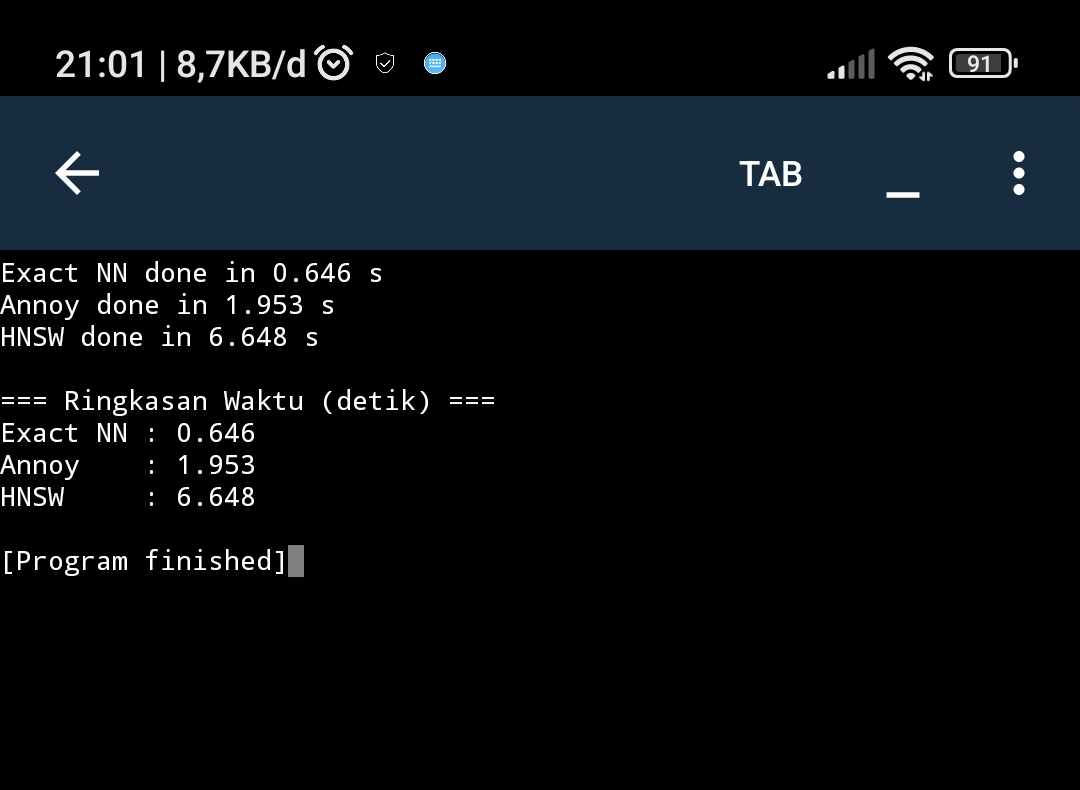